In [ ]:
#!pip install pycaret

In [1]:
import descartes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import pycaret.clustering as pc

In [2]:
df = pd.read_csv('C:/Users/ANKIT/Desktop/countries_data.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [5]:
cls = pc.setup(df, ignore_features=['country','name'])

,Description,Value
0,session_id,8494
1,Original Data,"(245, 4)"
2,Missing Values,True
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(245, 2)"
9,CPU Jobs,-1


In [6]:
km = pc.create_model('kmeans', num_clusters=7)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4642,420.4934,0.6564,0,0,0


In [7]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8494, tol=0.0001, verbose=0)

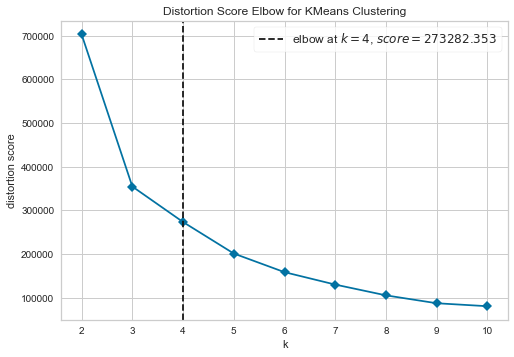

In [8]:
pc.plot_model(km, plot='elbow')

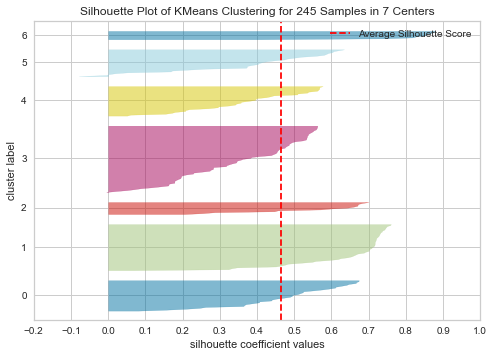

In [9]:
pc.plot_model(km, plot='silhouette')

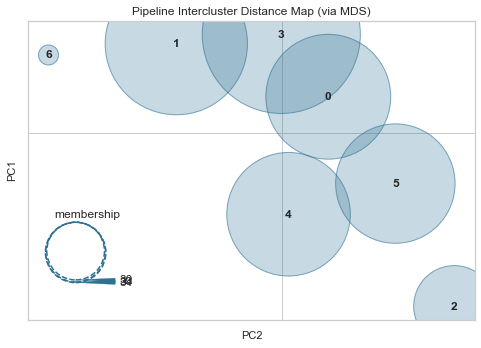

In [10]:
    pc.plot_model(km, plot='distance')

In [11]:
km_df = pc.assign_model(km)

In [12]:
km_df.head()

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,Cluster 3
1,AE,23.424076,53.847818,United Arab Emirates,Cluster 0
2,AF,33.939110,67.709953,Afghanistan,Cluster 0
3,AG,17.060816,-61.796428,Antigua and Barbuda,Cluster 1
4,AI,18.220554,-63.068615,Anguilla,Cluster 1


In [13]:
km_df2 = km_df.copy()

In [14]:
km_df2['Cluster'] = km_df2['Cluster'].str.replace('Cluster', '').apply(int)

In [15]:
km_df2.head()

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,3
1,AE,23.424076,53.847818,United Arab Emirates,0
2,AF,33.939110,67.709953,Afghanistan,0
3,AG,17.060816,-61.796428,Antigua and Barbuda,1
4,AI,18.220554,-63.068615,Anguilla,1


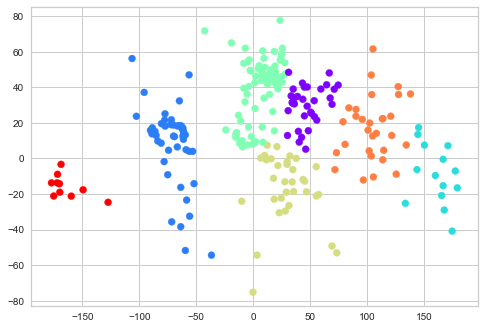

In [16]:
plt.scatter(km_df2['longitude'], km_df2['latitude'], c=km_df2['Cluster'], cmap='rainbow')

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

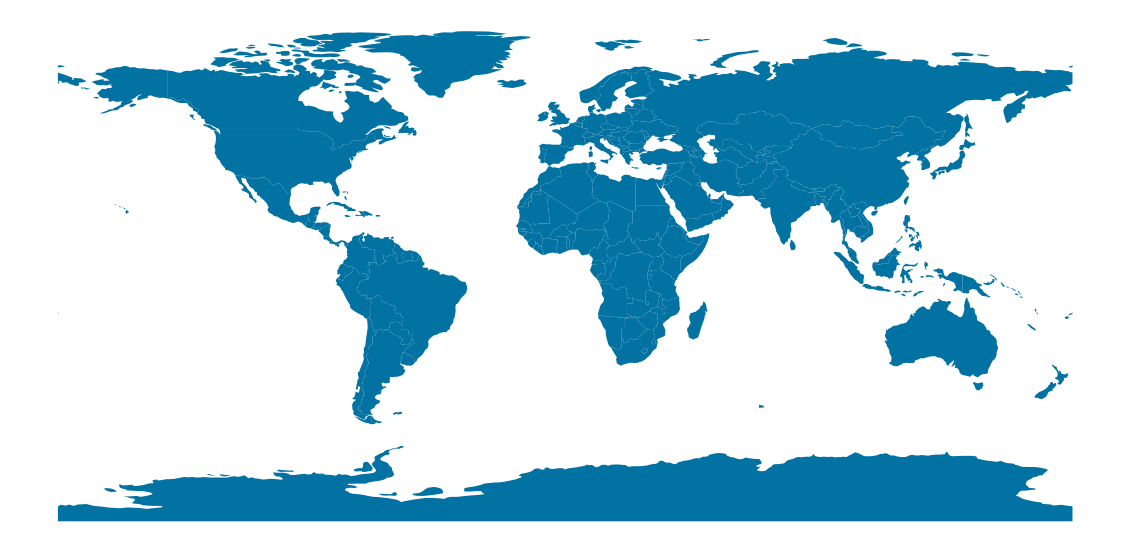

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

In [18]:
g = gpd.GeoDataFrame(km_df2, geometry=gpd.points_from_xy(km_df2['longitude'], km_df2['latitude']))

<AxesSubplot:>

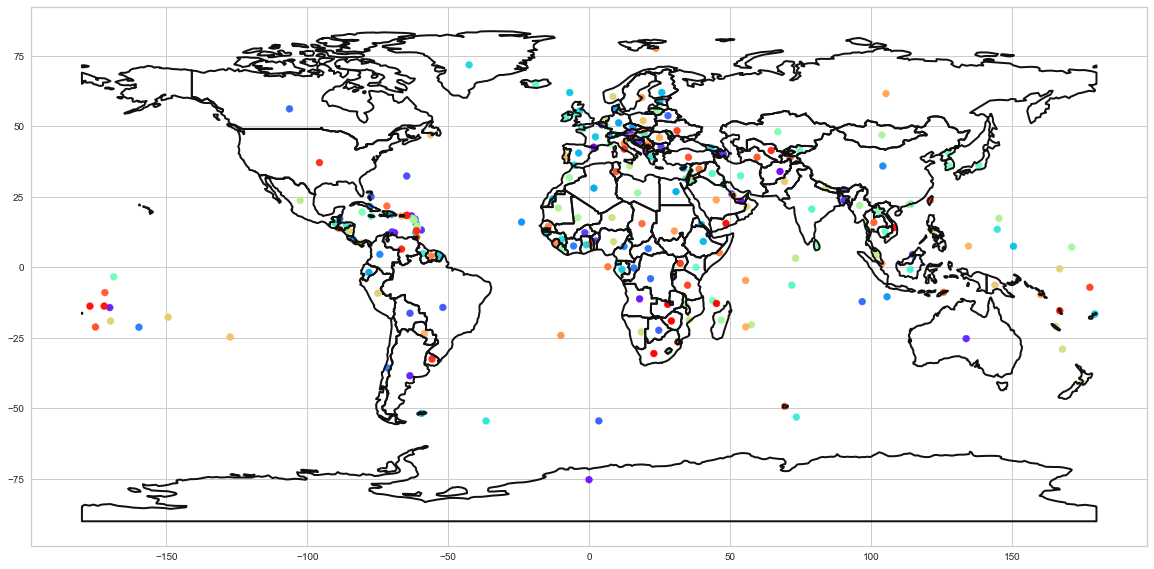

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
g.plot(cmap='rainbow', ax=ax)
world.geometry.boundary.plot(color=None, edgecolor='k', linewidth=2, ax=ax)

In [20]:
unknown_data = pd.DataFrame([{'latitude':,'longitude':-1.023194}])

In [21]:
clust_pred = pc.predict_model(km, unknown_data)

In [22]:
clust_pred

,latitude,longitude,Cluster
0,7.946527,-1.023194,Cluster 3


In [23]:
km_df[km_df['Cluster']=='Cluster 3']

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,Cluster 3
5,AL,41.153332,20.168331,Albania,Cluster 3
12,AT,47.516231,14.550072,Austria,Cluster 3
16,BA,43.915886,17.679076,Bosnia and Herzegovina,Cluster 3
19,BE,50.503887,4.469936,Belgium,Cluster 3
...,...,...,...,...,...
211,TG,8.619543,0.824782,Togo,Cluster 3
217,TN,33.886917,9.537499,Tunisia,Cluster 3
226,UM,NaN,NaN,U.S. Minor Outlying Islands,Cluster 3
230,VA,41.902916,12.453389,Vatican City,Cluster 3
